In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv('/content/Suicides in India 2001-2012.csv')

In [16]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


shape of the data

In [17]:
data.shape

(237519, 7)

check for null values

In [18]:
data.isna().sum()

,0
State,0
Year,0
Type_code,0
Type,0
Gender,0
Age_group,0
Total,0


calculate the suicides per year

How many people suicide per year?

In [26]:
suicides_per_year=data.groupby('Year')['Total'].sum().to_frame().reset_index()
suicides_per_year

,Year,Total
0,2001,976464
1,2002,993648
2,2003,997622
3,2004,1023137
4,2005,1025201
5,2006,1062991
6,2007,1103667
7,2008,1125082
8,2009,1144033
9,2010,1211322


In [34]:
suicides_per_year['Total_in_lakhs'] = suicides_per_year.apply(lambda x: round(x['Total'] / 100000), axis=1)


Text(0, 0.5, 'suicides in lakhs')

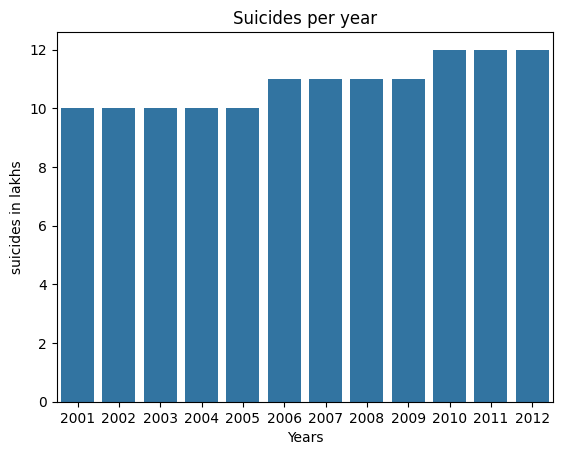

In [39]:
sns.barplot(x=suicides_per_year['Year'],y=suicides_per_year['Total_in_lakhs'])
plt.title("Suicides per year")
plt.xlabel("Years")
plt.ylabel("suicides in lakhs")

### is unemployment the reason for suicide ?

In [55]:
'Unemployment'in data['Type'].unique()

True

In [ ]:
len(data[data['Type']=='Unemployment'])

4200

### Insight :4200 suicide happend from 2001-2012 due to unemployment

:what are the types of suicide cases give a list called as "reasons_for_suicides"

In [61]:
reason_for_suicides=list(data['Type'].unique())
reason_for_suicides

['Illness (Aids/STD)',
 'Bankruptcy or Sudden change in Economic',
 'Cancellation/Non-Settlement of Marriage',
 'Physical Abuse (Rape/Incest Etc.)',
 'Dowry Dispute',
 'Family Problems',
 'Ideological Causes/Hero Worshipping',
 'Other Prolonged Illness',
 'Property Dispute',
 'Fall in Social Reputation',
 'Illegitimate Pregnancy',
 'Failure in Examination',
 'Insanity/Mental Illness',
 'Love Affairs',
 'Professional/Career Problem',
 'Divorce',
 'Drug Abuse/Addiction',
 'Not having Children(Barrenness/Impotency',
 'Causes Not known',
 'Unemployment',
 'Other Causes (Please Specity)',
 'Poverty',
 'Death of Dear Person',
 'Cancer',
 'Suspected/Illicit Relation',
 'Paralysis',
 'Diploma',
 'No Education',
 'Post Graduate and Above',
 'Middle',
 'Graduate',
 'Hr. Secondary/Intermediate/Pre-Universit',
 'Primary',
 'Matriculate/Secondary',
 'By Consuming Insecticides',
 'By Hanging',
 'By Jumping from (Other sites)',
 'By touching electric wires',
 'By Machine',
 'By Fire/Self Immolation',

give a dataframe explaining the type of suicide with the count of it

In [72]:
suicides_type=data.groupby('Type')['Total'].sum().sort_values(ascending=False).reset_index()
suicides_type

,Type,Total
0,Married,3065322
1,Primary,1088481
2,Middle,1028913
3,No Education,965271
4,Never Married,954903
...,...,...
64,Bankruptcy or Sudden change in Economic Status,2655
65,Illegitimate Pregnancy,2494
66,Ideological Causes/Hero Worshipping,2118
67,By Machine,1661


sketch a chart explaing the frequency of top 5 suicide types

<Axes: xlabel='Type', ylabel='Total'>

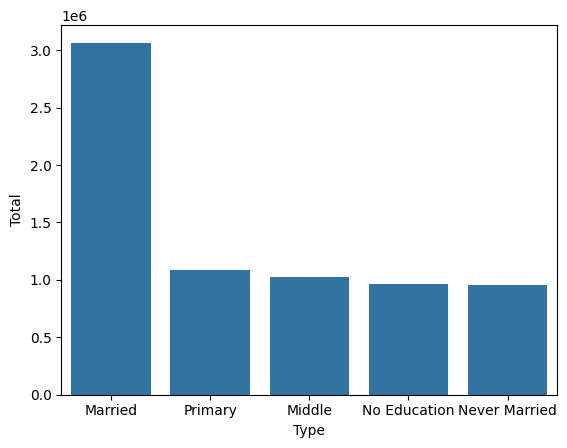

In [77]:
sns.barplot(x=suicides_type['Type'][:5],y=suicides_type['Total'][:5])

sketch a chart explainig the freuquency of least 5 suicide types

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bankruptcy or Sudden change in Economic Status'),
  Text(1, 0, 'Illegitimate Pregnancy'),
  Text(2, 0, 'Ideological Causes/Hero Worshipping'),
  Text(3, 0, 'By Machine'),
  Text(4, 0, 'Not having Children (Barrenness/Impotency')])

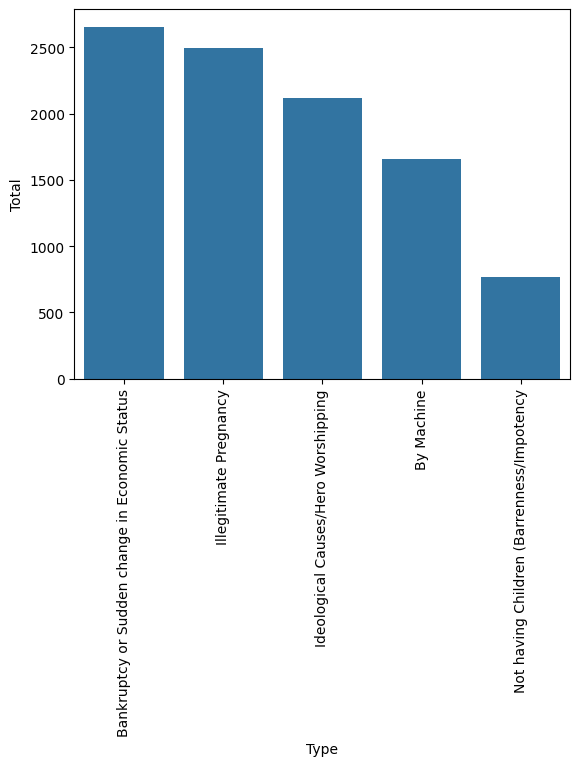

In [89]:
sns.barplot(x=suicides_type['Type'][-5:],y=suicides_type['Total'][-5:])
plt.xticks(rotation=90)

which gender wise suicide count ?

In [102]:
gender_suicide_count=data['Gender'].value_counts().reset_index()
gender_suicide_count

,Gender,count
0,Male,118879
1,Female,118640


which gender is mostly like to have high suicide rate , explain in charts

([<matplotlib.patches.Wedge at 0x78051bd578e0>,
 [Text(-0.0017386668802414063, 1.099998625925269, 'Male'),
  Text(0.0017386668802412718, -1.099998625925269, 'Female')],
 [Text(-0.0009483637528589488, 0.599999250504692, '50%'),
  Text(0.0009483637528588754, -0.599999250504692, '50%')])

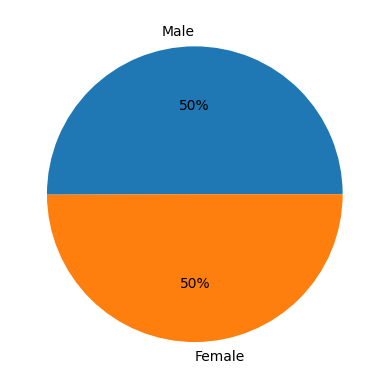

In [104]:
plt.pie(gender_suicide_count['count'],labels=gender_suicide_count['Gender'],autopct='%1.0f%%')

Give the freuquency of suicide according to the age group and also explain in visuals ?

In [126]:
age_group_suicide_frequency=data.groupby('Age_group')['Total'].sum().sort_values(ascending=True).reset_index()
age_group_suicide_frequency


,Age_group,Total
0,0-14,98410
1,60+,346925
2,45-59,885177
3,30-44,1471599
4,15-29,1534037
5,0-100+,8735586


removing the 5th index because it is an aggregated age group from age 0 to 100+

In [127]:
age_group_suicide_frequency.drop(index=5,inplace=True)

In [136]:
age_group_suicide_frequency['toatal_in_lakhs']=age_group_suicide_frequency['Total'].apply(lambda x : x/100000)

In [137]:
age_group_suicide_frequency

,Age_group,Total,toatal_in_lakhs
0,0-14,98410,0.98410
1,60+,346925,3.46925
2,45-59,885177,8.85177
3,30-44,1471599,14.71599
4,15-29,1534037,15.34037


Text(0, 0.5, 'SUICIDE NUMBERS IN LAKHS')

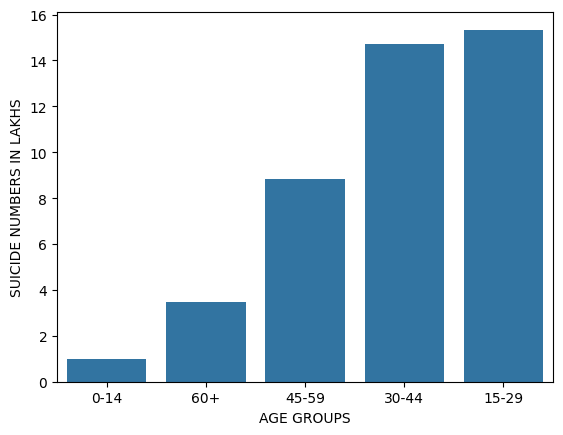

In [138]:
sns.barplot(x=age_group_suicide_frequency['Age_group'],y=age_group_suicide_frequency['toatal_in_lakhs'])

plt.xlabel("AGE GROUPS")
plt.ylabel("SUICIDE NUMBERS IN LAKHS")

state wise suicide count and also explian in visuals ?



In [154]:
state_wise_suicides_count=data.groupby('State')['Total'].sum().sort_values(ascending=False).reset_index()
state_wise_suicides_count

,State,Total
0,Total (All India),2911862
1,Total (States),2858026
2,Maharashtra,901945
3,West Bengal,849936
4,Tamil Nadu,818691
5,Andhra Pradesh,814059
6,Karnataka,734825
7,Kerala,538946
8,Madhya Pradesh,451535
9,Gujarat,330858


,State,Total
2,Maharashtra,901945
3,West Bengal,849936
4,Tamil Nadu,818691
5,Andhra Pradesh,814059
6,Karnataka,734825
7,Kerala,538946


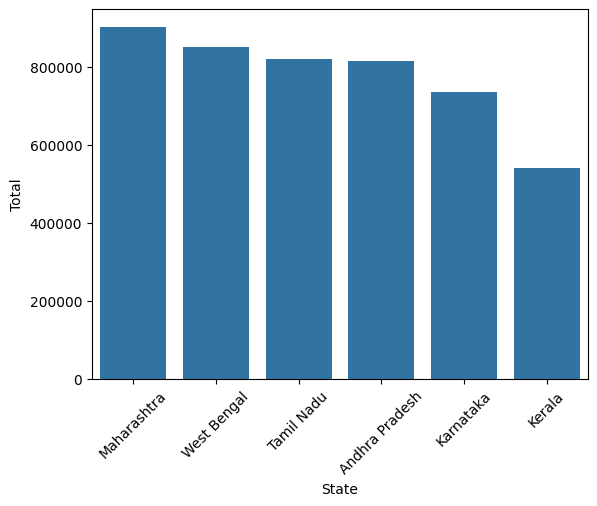

In [178]:
sns.barplot(x=state_wise_suicides_count['State'][2:8],y=state_wise_suicides_count['Total'][2:8])
plt.xticks(rotation=45)
state_wise_suicides_count[2:8]



([<matplotlib.patches.Wedge at 0x780518d6fa60>,
 [Text(0.9800059900547238, 0.4995880897868372, 'Maharashtra'),
  Text(0.20088859065038164, 1.0815007046444787, 'West Bengal'),
  Text(-0.6989388256575472, 0.8494024475997518, 'Tamil Nadu'),
  Text(-1.099542500652449, 0.031722062652976314, 'Andhra Pradesh'),
  Text(-0.7814240370534156, -0.774194080521895, 'Karnataka'),
  Text(-0.13632686025415308, -1.0915195770911508, 'Kerala'),
  Text(0.42173078618836407, -1.0159444591024376, 'Madhya Pradesh'),
  Text(0.79094254411955, -0.7644670639744356, 'Gujarat'),
  Text(0.9964407265558258, -0.46594621842107287, 'Chhattisgarh'),
  Text(1.089286413169582, -0.15315061241845151, 'Odisha')],
 [Text(0.534548721848031, 0.2725025944291839, '15.0%'),
  Text(0.10957559490020817, 0.5899094752606246, '14.1%'),
  Text(-0.38123935944957116, 0.4633104259635009, '13.6%'),
  Text(-0.5997504549013357, 0.017302943265259805, '13.5%'),
  Text(-0.42623129293822665, -0.42228768028466995, '12.2%'),
  Text(-0.074360105593174

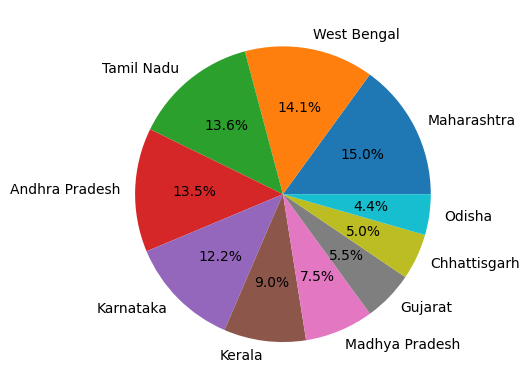

In [179]:
plt.pie(state_wise_suicides_count['Total'][2:12],labels=state_wise_suicides_count['State'][2:12],autopct="%0.1f%%")

which three states has highest suicide rates ?

In [158]:
state_wise_suicides_count[2:5]

,State,Total
2,Maharashtra,901945
3,West Bengal,849936
4,Tamil Nadu,818691


which state has lowest suicide rate?

In [161]:
state_wise_suicides_count[-1:]

,State,Total
37,Lakshadweep,50


between age 0-14 and 15-29 what are the reason for suicde and give the frequency of the suicides and alos explain the major five types in visuals?

In [204]:
youth_data=data[(data['Age_group']=='0-14') | (data['Age_group']=='15-29')]
youth_data_grouped=youth_data.groupby('Type')['Total'].sum().sort_values(ascending=False).reset_index()

In [213]:
youth_data_grouped[:5]

,Type,Total
0,By Hanging,176914
1,Others (Please Specify),155539
2,House Wife,127984
3,Family Problems,125681
4,By Consuming Insecticides,104929


top 5 reason for suicide in visuals

([0, 1, 2, 3, 4],
 [Text(0, 0, 'By Hanging'),
  Text(1, 0, 'Others (Please Specify)'),
  Text(2, 0, 'House Wife'),
  Text(3, 0, 'Family Problems'),
  Text(4, 0, 'By Consuming Insecticides')])

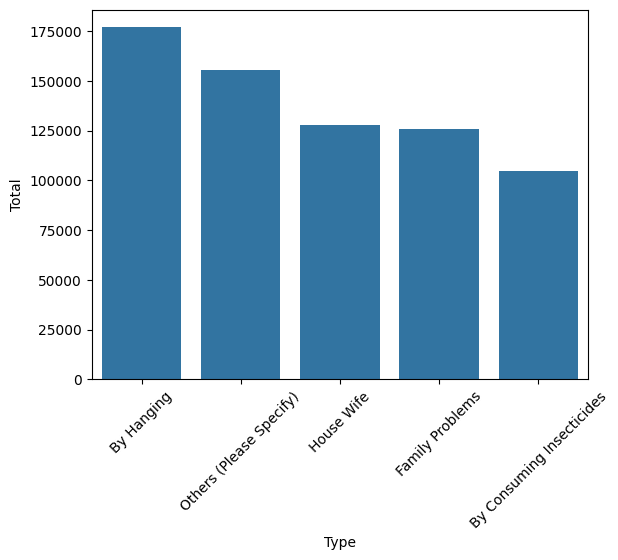

In [214]:
sns.barplot(x=youth_data_grouped['Type'][:5],y=youth_data_grouped['Total'][:5])
plt.xticks(rotation=45)

what are the least 10 suicides types and also explain in visuals ?

In [217]:
youth_data_grouped[-10:]

,Type,Total
46,By Self Infliction of injury,1847
47,Illegitimate Pregnancy,1769
48,Divorce,1557
49,Paralysis,1121
50,Cancer,956
51,Ideological Causes/Hero Worshipping,859
52,By Machine,626
53,Bankruptcy or Sudden change in Economic Status,486
54,Not having Children (Barrenness/Impotency,300
55,Retired Person,294


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'By Self Infliction of injury'),
  Text(1, 0, 'Illegitimate Pregnancy'),
  Text(2, 0, 'Divorce'),
  Text(3, 0, 'Paralysis'),
  Text(4, 0, 'Cancer'),
  Text(5, 0, 'Ideological Causes/Hero Worshipping'),
  Text(6, 0, 'By Machine'),
  Text(7, 0, 'Bankruptcy or Sudden change in Economic Status'),
  Text(8, 0, 'Not having Children (Barrenness/Impotency'),
  Text(9, 0, 'Retired Person')])

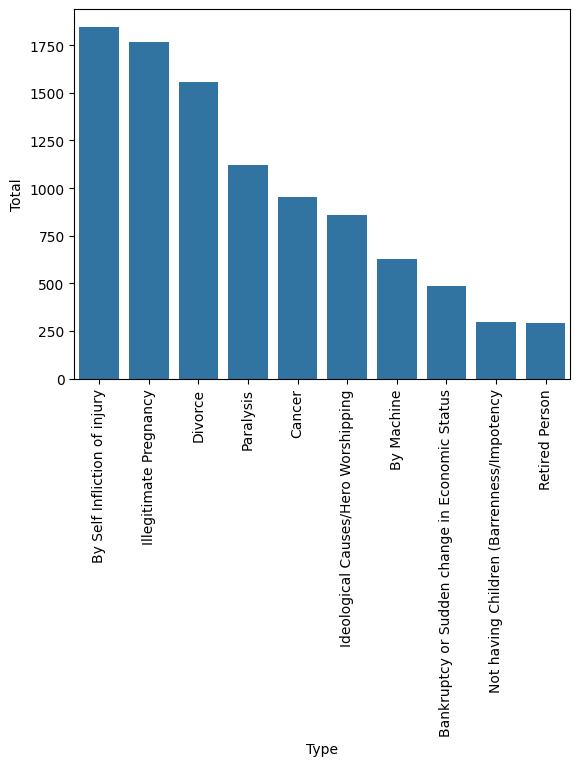

In [216]:
sns.barplot(x=youth_data_grouped['Type'][-10:],y=youth_data_grouped['Total'][-10:])
plt.xticks(rotation=90)